In [1]:
import time
import numpy
from galpy.util import bovy_plot
%pylab inline
numpy.random.seed(1)

Populating the interactive namespace from numpy and matplotlib


## Examples of ABC inference

## Coin flip with two flips

We've flipped a coin twice and gotten heads twice. What is the probability for getting heads?

In [2]:
data= ['H','H']
outcomes= ['T','H']

In [3]:
def coin_ABC():
    while True:
        h= numpy.random.uniform()
        flips= numpy.random.binomial(1,h,size=2)
        if outcomes[flips[0]] == data[0] \
            and outcomes[flips[1]] == data[1]:
                yield h

In [4]:
hsamples= []
start= time.time()
for h in coin_ABC():
    hsamples.append(h)
    if time.time() > start+2.: break
print "Obtained %i samples" % len(hsamples)

Obtained 173311 samples


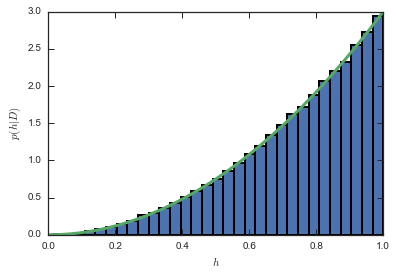

In [5]:
dum= hist(hsamples,bins=31,lw=2.,normed=True,zorder=0)
plot(numpy.linspace(0.,1.,1001),numpy.linspace(0.,1.,1001)**2.*3.,lw=3.)
xlabel(r'$h$')
ylabel(r'$p(h|D)$')

## Coin flip with 10 flips

Same with 10 flips, still matching the entire sequence:

In [6]:
data= ['T', 'H', 'H', 'T', 'T', 'H', 'H', 'T', 'H', 'H']

In [7]:
def coin_ABC_10flips():
    while True:
        h= numpy.random.uniform()
        flips= numpy.random.binomial(1,h,size=len(data))
        if outcomes[flips[0]] == data[0] \
            and outcomes[flips[1]] == data[1] \
            and outcomes[flips[2]] == data[2] \
            and outcomes[flips[3]] == data[3] \
            and outcomes[flips[4]] == data[4] \
            and outcomes[flips[5]] == data[5] \
            and outcomes[flips[6]] == data[6] \
            and outcomes[flips[7]] == data[7] \
            and outcomes[flips[8]] == data[8] \
            and outcomes[flips[9]] == data[9]:
                yield h

In [8]:
hsamples= []
start= time.time()
for h in coin_ABC_10flips():
    hsamples.append(h)
    if time.time() > start+2.: break
print "Obtained %i samples" % len(hsamples)

Obtained 231 samples


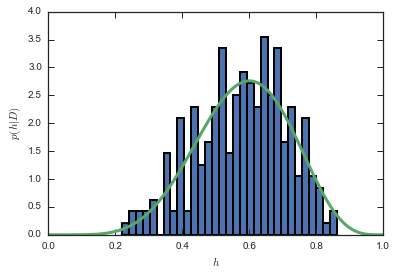

In [9]:
dum= hist(hsamples,bins=31,lw=2.,normed=True,zorder=0)
xs= numpy.linspace(0.,1.,1001)
ys= xs**numpy.sum([d == 'H' for d in data])*(1.-xs)**numpy.sum([d == 'T' for d in data])
ys/= numpy.sum(ys)*(xs[1]-xs[0])
plot(xs,ys,lw=3.)
xlabel(r'$h$')
ylabel(r'$p(h|D)$')

Using a sufficient statistic instead:

In [10]:
sufficient_data= numpy.sum([d == 'H' for d in data])
def coin_ABC_10flips_suff():
    while True:
        h= numpy.random.uniform()
        flips= numpy.random.binomial(1,h,size=len(data))
        if numpy.sum(flips) == sufficient_data:
            yield h

In [11]:
hsamples= []
start= time.time()
for h in coin_ABC_10flips_suff():
    hsamples.append(h)
    if time.time() > start+2.: break
print "Obtained %i samples" % len(hsamples)

Obtained 20145 samples


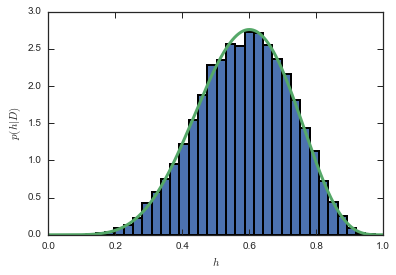

In [12]:
dum= hist(hsamples,bins=31,lw=2.,normed=True,zorder=0)
xs= numpy.linspace(0.,1.,1001)
ys= xs**numpy.sum([d == 'H' for d in data])*(1.-xs)**numpy.sum([d == 'T' for d in data])
ys/= numpy.sum(ys)*(xs[1]-xs[0])
plot(xs,ys,lw=3.)
xlabel(r'$h$')
ylabel(r'$p(h|D)$')

## Variance of a Gaussian with zero mean

Now we infer the variance of a Gaussian with zero mean using ABC:

In [13]:
data= numpy.random.normal(size=100)

In [14]:
def Var_ABC(n=1000,threshold=0.05):
    while True:
        v= numpy.random.uniform()*4
        sim= numpy.random.normal(size=len(data))*numpy.sqrt(v)
        d= numpy.fabs(numpy.var(sim)-numpy.var(data))
        if d < threshold:
            yield v

In [15]:
vsamples= []
start= time.time()
for v in Var_ABC(threshold=0.05):
    vsamples.append(v)
    if time.time() > start+2.: break
print "Obtained %i samples" % len(vsamples)

Obtained 918 samples


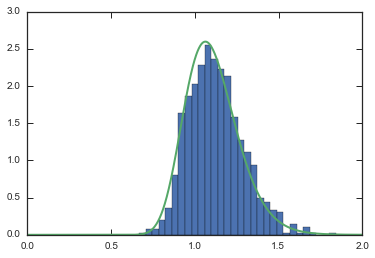

In [16]:
h= hist(vsamples,range=[0.,2.],bins=51,normed=True)
xs= numpy.linspace(0.001,2.,1001)
ys= xs**(-len(data)/2.)*numpy.exp(-1./xs/2.*len(data)*(numpy.var(data)+numpy.mean(data)**2.))
ys/= numpy.sum(ys)*(xs[1]-xs[0])
plot(xs,ys,lw=2.)

If we raise the threshold too much, we sample simply from the prior:

In [17]:
vsamples= []
start= time.time()
for v in Var_ABC(threshold=1.5):
    vsamples.append(v)
    if time.time() > start+2.: break
print "Obtained %i samples" % len(vsamples)

Obtained 23193 samples


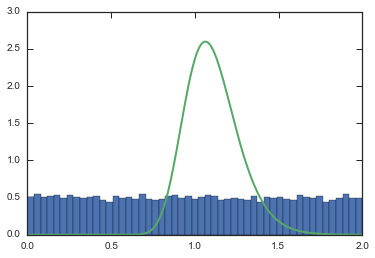

In [18]:
h= hist(vsamples,range=[0.,2.],bins=51,normed=True)
xs= numpy.linspace(0.001,2.,1001)
ys= xs**(-len(data)/2.)*numpy.exp(-1./xs/2.*len(data)*(numpy.var(data)+numpy.mean(data)**2.))
ys/= numpy.sum(ys)*(xs[1]-xs[0])
plot(xs,ys,lw=2.)

And if we make the threshold too small, we don't get many samples:

In [19]:
vsamples= []
start= time.time()
for v in Var_ABC(threshold=0.001):
    vsamples.append(v)
    if time.time() > start+2.: break
print "Obtained %i samples" % len(vsamples)

Obtained 16 samples


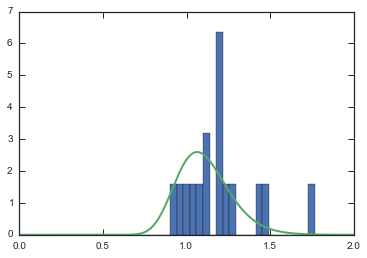

In [20]:
h= hist(vsamples,range=[0.,2.],bins=51,normed=True)
xs= numpy.linspace(0.001,2.,1001)
ys= xs**(-len(data)/2.)*numpy.exp(-1./xs/2.*len(data)*(numpy.var(data)+numpy.mean(data)**2.))
ys/= numpy.sum(ys)*(xs[1]-xs[0])
plot(xs,ys,lw=2.)